In [ ]:
import pandas as pd
import csv

# Load the dataset
df = pd.read_csv('online_retail.csv')

# Remove missing customers
df = df.dropna(subset=['Customer ID'])

# Convert 'Customer Id' to integer
df['Customer ID'] = df['Customer ID'].astype(int)

# Remove canceled orders
df = df[~df['Invoice'].str.startswith('C')]

# Remove rows where item price was '0'
df = df[df['Price'] > 0]

# Remove non-product stock codes
# List of non-product codes
non_product_codes = ['POST', 'DOT', 'ADJUST', 'C2', 'M', 'BANK CHARGES']

# Keep only rows where StockCode is NOT in the list
df = df[~df['StockCode'].isin(non_product_codes)]

# Create 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['Price']

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Year, Month, DayOfWeek, Hour:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Save the cleaned dataset to a new CSV file
df.to_csv('online_retail_cleaned.csv', index=False)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,DayOfWeek,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1,7


Dataset Shape: (802669, 13)
Missing Values:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
Year           0
Month          0
DayOfWeek      0
Hour           0
dtype: int64
             Invoice       Quantity          Price    Customer ID  \
count  802669.000000  802669.000000  802669.000000  802669.000000   
mean   537404.479164      13.318936       2.931855   15338.123956   
std     26667.346675     143.865811       4.309705    1693.923117   
min    489434.000000       1.000000       0.001000   12346.000000   
25%    514949.000000       2.000000       1.250000   13988.000000   
50%    536987.000000       5.000000       1.950000   15276.000000   
75%    561616.000000      12.000000       3.750000   16809.000000   
max    581587.000000   80995.000000     649.500000   18287.000000   

          TotalPrice           Year          Month      DayOfWeek  \
count  802669.000000  802669.0

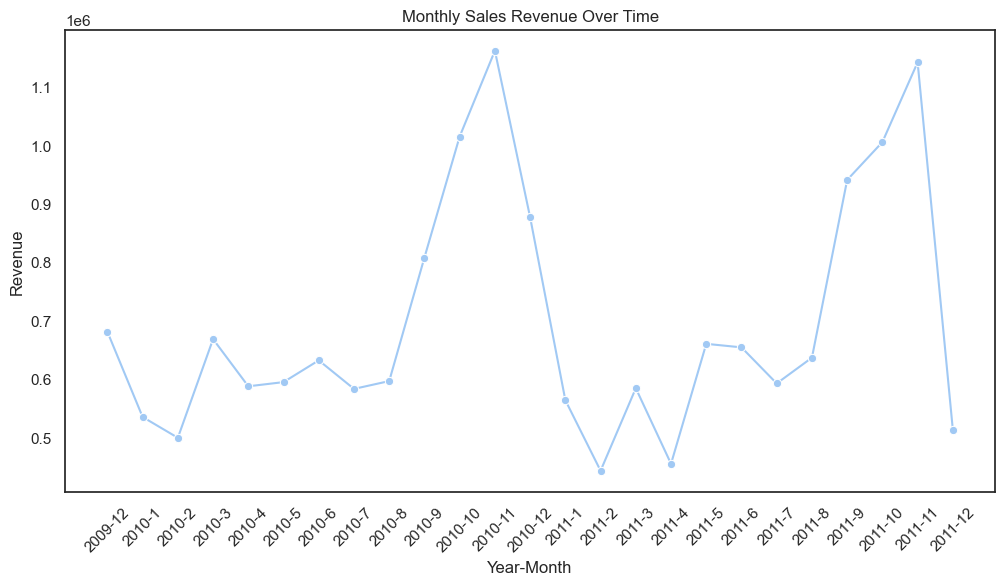

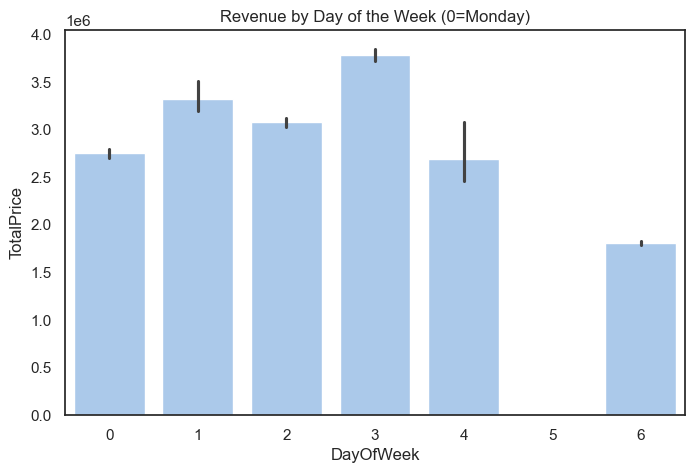

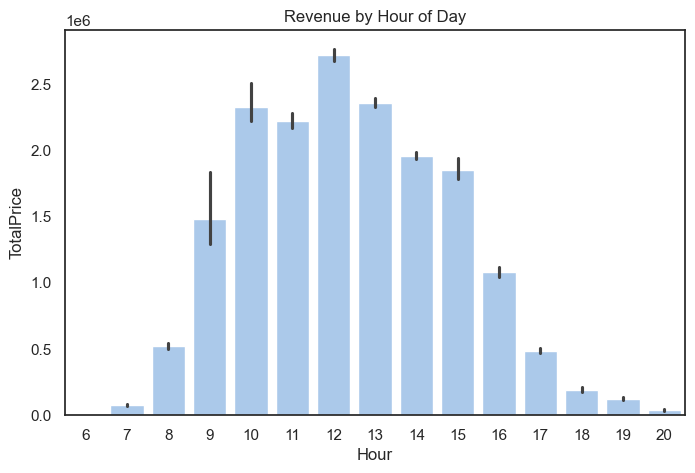

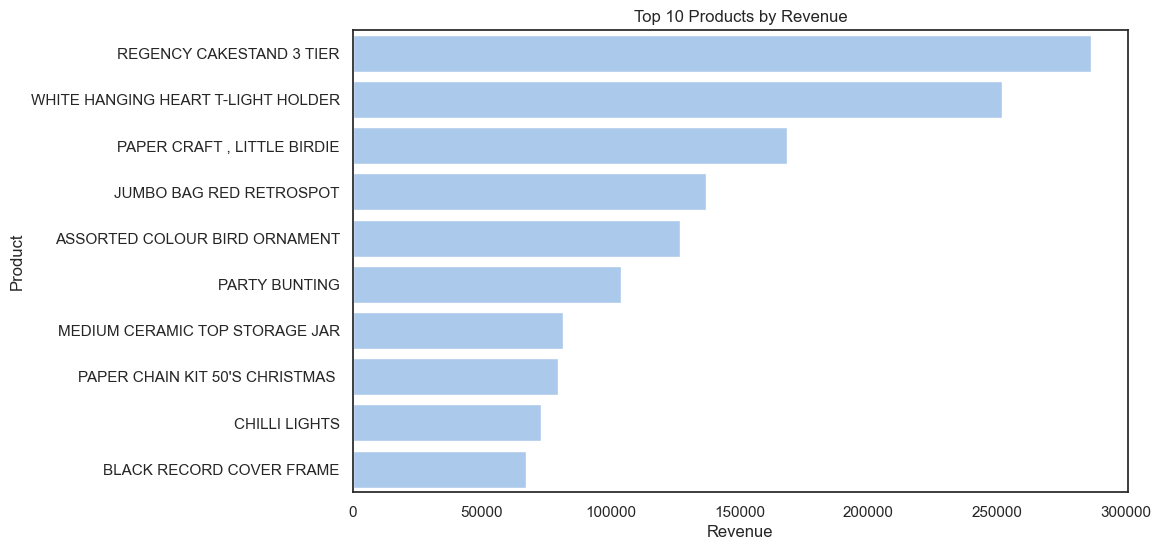

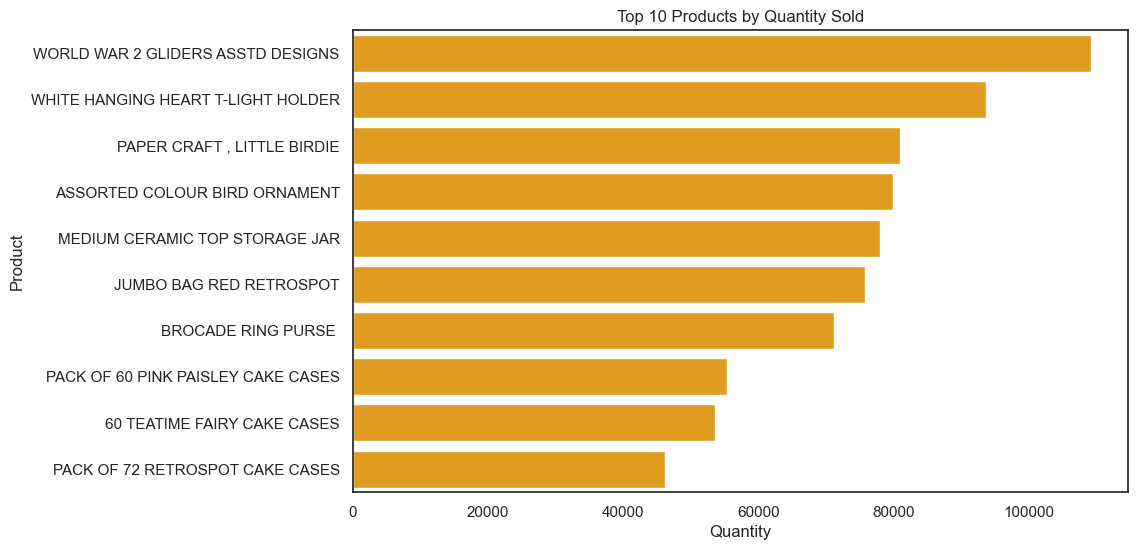

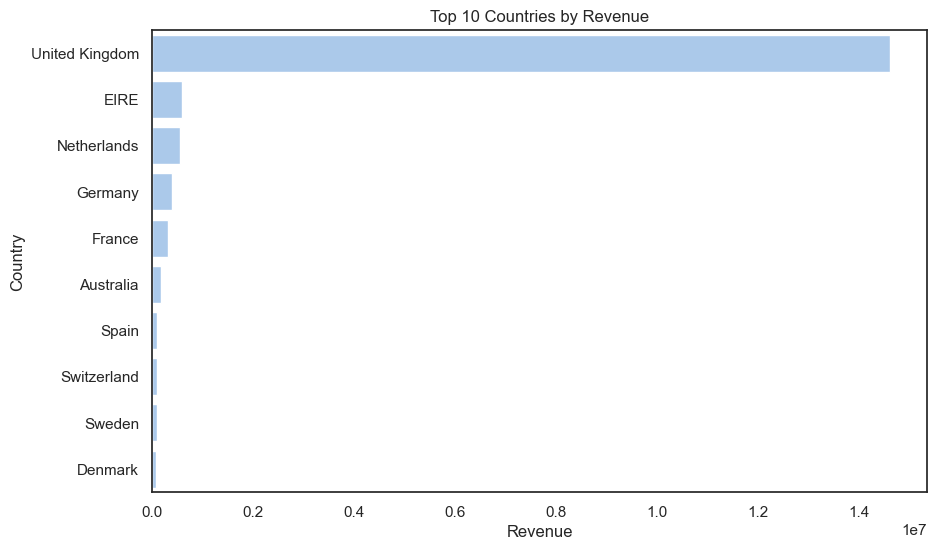

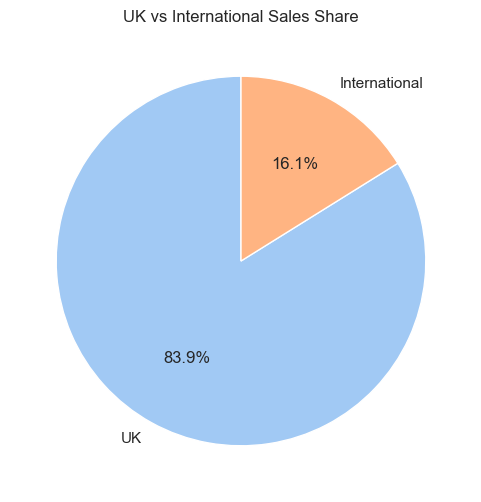

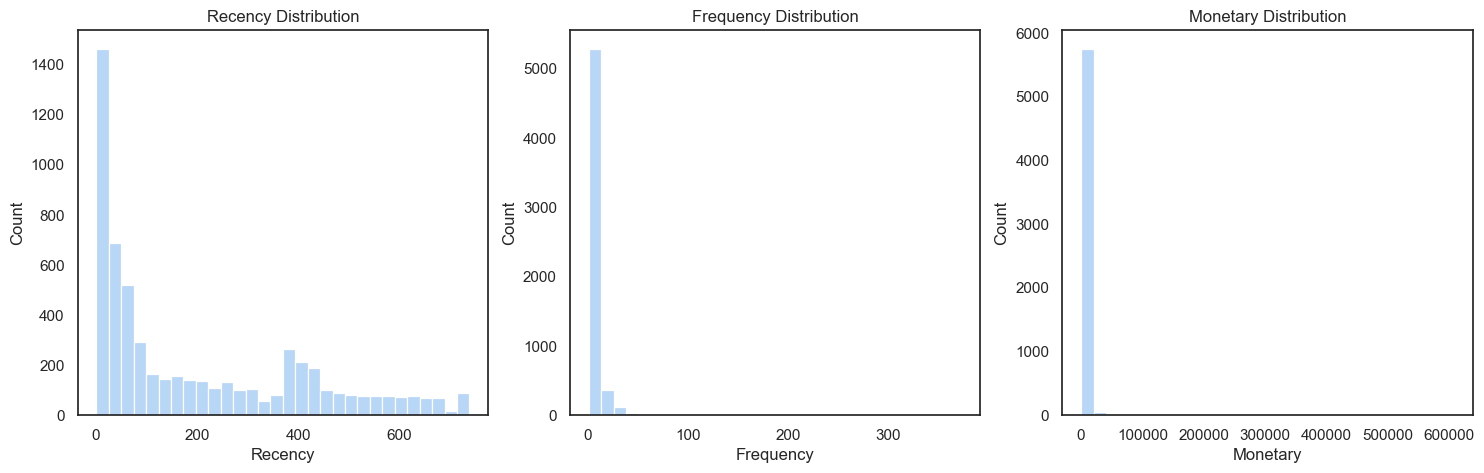

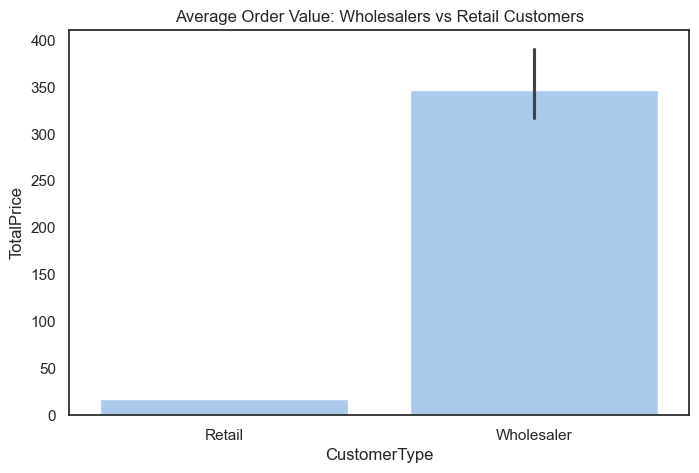

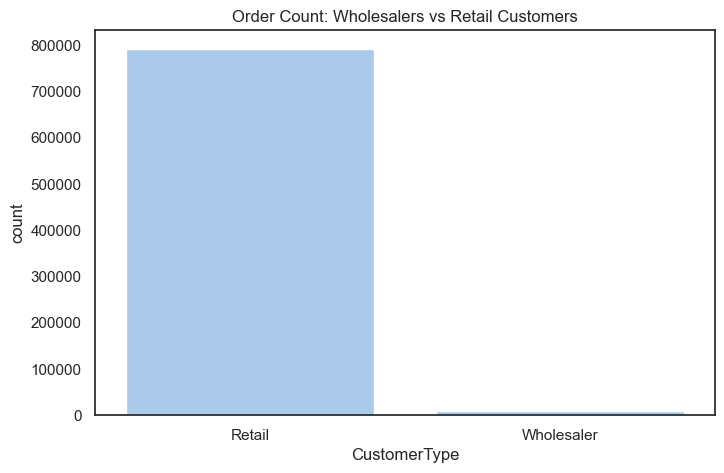

In [ ]:
# pip install matplotlib seaborn

# 1. Libraries & Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
sns.set_theme(style="white", palette="pastel")


# Load cleaned dataset
df = pd.read_csv("online_retail_cleaned.csv")

# Quick look at the dataset
display(df.head())
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())

# 2. Basic Descriptive Statistics
print(df.describe())

# Number of unique customers, products, and invoices
print("Unique Customers:", df["Customer ID"].nunique())
print("Unique Products:", df["StockCode"].nunique())
print("Unique Invoices:", df["Invoice"].nunique())

# 3. Sales Performance & Seasonality

# Monthly revenue trend
monthly_sales = df.groupby(["Year", "Month"])["TotalPrice"].sum().reset_index()
monthly_sales["YearMonth"] = monthly_sales["Year"].astype(str) + "-" + monthly_sales["Month"].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="YearMonth", y="TotalPrice", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Revenue Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Revenue")
plt.show()

# Day of Week Sales
plt.figure(figsize=(8,5))
sns.barplot(x="DayOfWeek", y="TotalPrice", data=df, estimator=sum)
plt.title("Revenue by Day of the Week (0=Monday)")
plt.show()

# Hourly Sales
plt.figure(figsize=(8,5))
sns.barplot(x="Hour", y="TotalPrice", data=df, estimator=sum)
plt.title("Revenue by Hour of Day")
plt.show()

# 4. Product Portfolio Analysis
product_sales = df.groupby("Description")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

# Top 10 by Quantity
product_quantity = df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=product_quantity.values, y=product_quantity.index, color="orange")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.show()

# 5. Geographic Footprint
country_sales = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=country_sales.values, y=country_sales.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

# Domestic vs International
uk_sales = df[df["Country"]=="United Kingdom"]["TotalPrice"].sum()
intl_sales = df[df["Country"]!="United Kingdom"]["TotalPrice"].sum()

plt.figure(figsize=(6,6))
plt.pie([uk_sales, intl_sales], labels=["UK", "International"], autopct="%.1f%%", startangle=90)
plt.title("UK vs International Sales Share")
plt.show()

# 6. Customer Segmentation (RFM)

# Recency = days since last purchase
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "nunique",
    "TotalPrice": "sum"
})
rfm.rename(columns={"InvoiceDate":"Recency","Invoice":"Frequency","TotalPrice":"Monetary"}, inplace=True)

# Distribution of RFM
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.histplot(rfm["Recency"], bins=30, ax=axes[0])
axes[0].set_title("Recency Distribution")
sns.histplot(rfm["Frequency"], bins=30, ax=axes[1])
axes[1].set_title("Frequency Distribution")
sns.histplot(rfm["Monetary"], bins=30, ax=axes[2])
axes[2].set_title("Monetary Distribution")
plt.show()

# 7. Wholesale vs Retail Analysis

# Assuming wholesale = bulk orders (>100 items in a single invoice)
df["CustomerType"] = np.where(df["Quantity"]>100, "Wholesaler", "Retail")

plt.figure(figsize=(8,5))
sns.barplot(x="CustomerType", y="TotalPrice", data=df, estimator=np.mean)
plt.title("Average Order Value: Wholesalers vs Retail Customers")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x="CustomerType", data=df)
plt.title("Order Count: Wholesalers vs Retail Customers")
plt.show()